In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cmocean as cm
import pandas as pd
from scipy import stats



import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)



In [2]:
HardDisk = '/g/data/v45/amh157/OCCIPUT/'
EnsembleDir = 'geouv/'

## Make a title figure.

In [21]:
ufilename = HardDisk+EnsembleDir+'e001/ugeo_001_1988.nc'
u = xr.open_dataset(ufilename).vozocrtx
vfilename = HardDisk+EnsembleDir+'e001/vgeo_001_1988.nc'
v = xr.open_dataset(vfilename).vomecrty
ee = (u.isel(time_counter=1)**2 + v.isel(time_counter=1)**2)**0.5

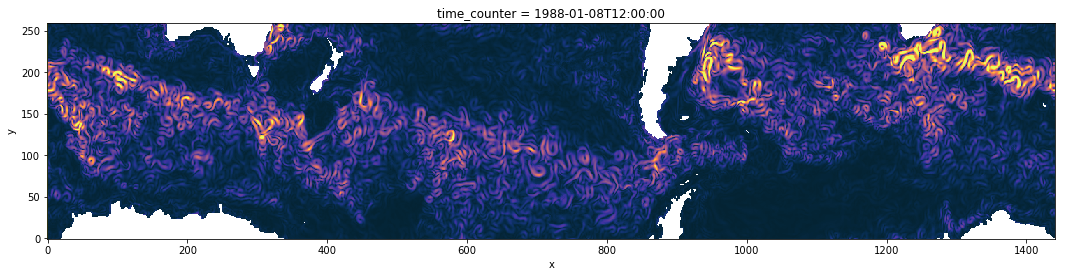

In [35]:
plt.figure(figsize=(14,3))
plt.axes([0, 0, 1, 1])
ee.isel(y=slice(110,370)).plot(vmax=0.7,cmap=cm.cm.thermal,add_colorbar=False)
plt.savefig('temp.png',dpi=200)

## Make a cherry-picked SO EKE figure

In [203]:
def cherrypickplot(ii):
    i00 = '%03d' % ii
    lon1=-287
    lon2=73
    lat1=-60
    lat2=-40

    start = pd.datetime(1980,1,1) ## start time for plotting
    end = pd.datetime(2014,12,31)
    
    col='r'

    Member = 'e'+i00
    ekefilename = HardDisk+EnsembleDir+Member+'/eke_'+i00+'_????.nc'
    
    plt.figure(figsize=(7.5,6))
    ax_eke=plt.subplot(111)
    eke = xr.open_mfdataset(ekefilename).EKE
    
    eke = eke.sel(lon=slice(lon1,lon2)).sel(lat=slice(lat1,lat2)).mean('lon').mean('lat')
    eke = eke.rolling(time=12,center=True).mean().load()
    eke.plot(ax=ax_eke,color=col,linewidth=2,label='Transient KE')
    ax_eke.set_xlabel('Year')
    ax_eke.set_ylabel('Transient KE (m$^2$/s$^2$)',color=col)
    ax_eke.set_ylim(ymax=0.013)
    ax_eke.tick_params('y',labelcolor=col)
    
    ax_tau=ax_eke.twinx()

    taufilename = HardDisk+EnsembleDir+'tau/'+'tau_????.nc'
    tau = xr.open_mfdataset(taufilename).tau
    
    tau = tau.sel(lon=slice(lon1,lon2)).sel(lat=slice(lat1,lat2)).mean('lon').mean('lat')
    tau = tau.rolling(time=12,center=True).mean().load()
    tau.plot(ax=ax_tau,color='k',linestyle='--',linewidth=2,label='Wind Stress')
    ax_tau.set_ylim([0.14, 0.18])
    ax_tau.set_ylabel('Wind Stress (N/m$^2$)')
    ax_tau.set_xlim([start,end])
    

    ekep = eke[6:-6] - eke.mean()
    taup = tau[6:-6] - tau.mean()
    coef, signif = pearsoncor(taup,ekep)
    lag = coef.argmax() 

    ax_corr = plt.axes([0.18,0.68,0.2,0.22])
    ax_corr.plot(coef)
    print('Correlations: %d months, %0.2f, %0.2f'%(lag, coef[lag], signif[lag]))

    ax_corr.plot(lag,coef[lag],'.')
    
    ax_corr.set_xlim([0,48])
    ax_corr.set_ylim([0,0.6])
    ax_corr.set_xticks([0, 12, 24, 36])
    ax_corr.set_title('Lag Correlation')
    ax_corr.set_xlabel('Months')
    #ax_corr.set_ylabel('Correlation')
    ax_corr.grid()
    
    plt.savefig('figures/cherrypick_'+i00+'.png')



In [167]:
def pearsoncor(y1, y2):
    ## Looking for lagged correlations between two timeseries
    ## Assumes y1 is leading
    ## Avoid end effects by using only first 2/3rds of timeseries
    n = len(y1)
    nc = int(n/3.5)
    
    # De-mean both timeseries
    y1t = y1-np.mean(y1)
    y2t = y2-np.mean(y2)    

    cor = np.zeros(nc)
    sig = np.zeros(nc)
    for j in np.arange(0, nc):
        x1t = np.roll(y1t, j)[j:]#y1t[:-j]
        x2t = y2t[j:]
        cor[j], sig[j] = stats.pearsonr(x1t, x2t)
    return cor, sig

## Cherrypicking ~3 year lags

Correlations: 27 months, 0.46, 0.00


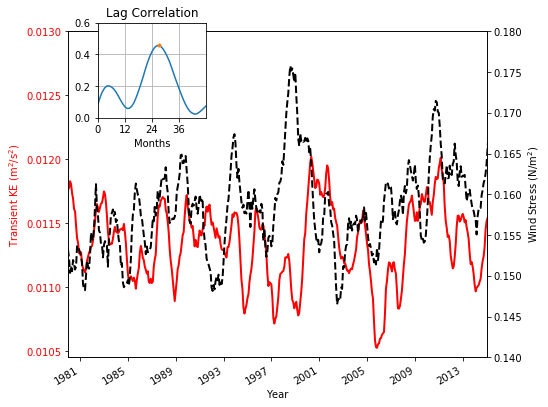

In [210]:
cherrypickplot(5)

Correlations: 27 months, 0.40, 0.00


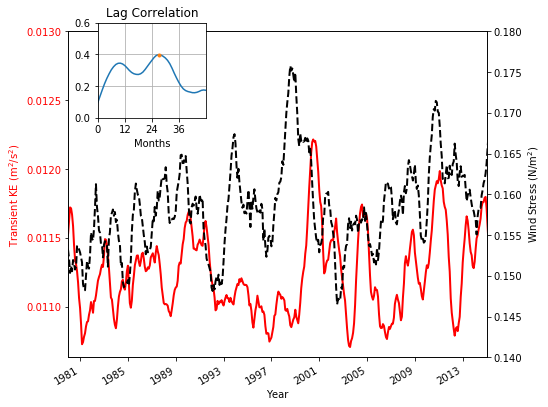

In [211]:
cherrypickplot(9)

Correlations: 30 months, 0.44, 0.00


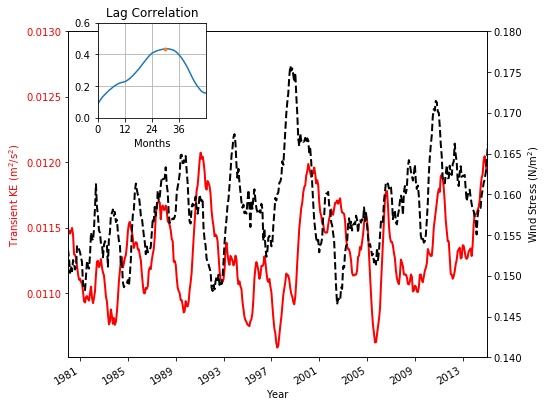

In [212]:
cherrypickplot(26)

Correlations: 32 months, 0.44, 0.00


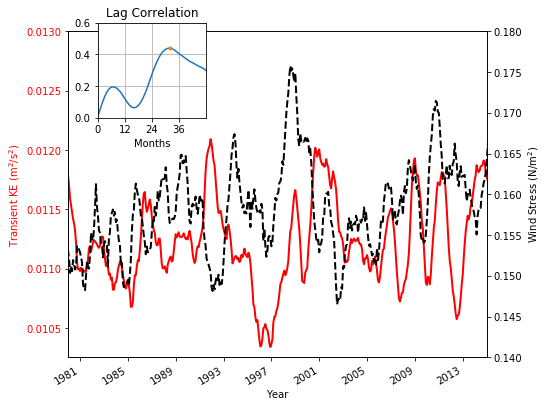

In [204]:
cherrypickplot(47)

# Cherrypicking < 1 year lags

Correlations: 5 months, 0.54, 0.00


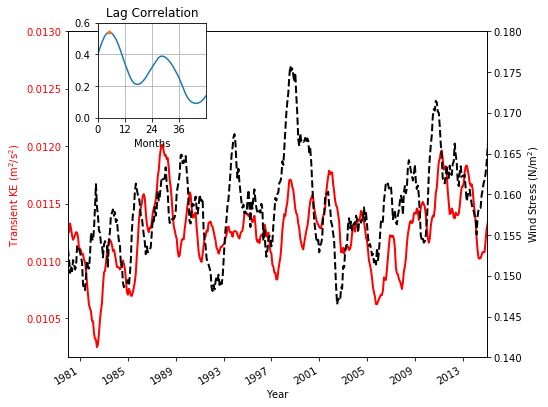

In [205]:
cherrypickplot(6)

Correlations: 8 months, 0.42, 0.00


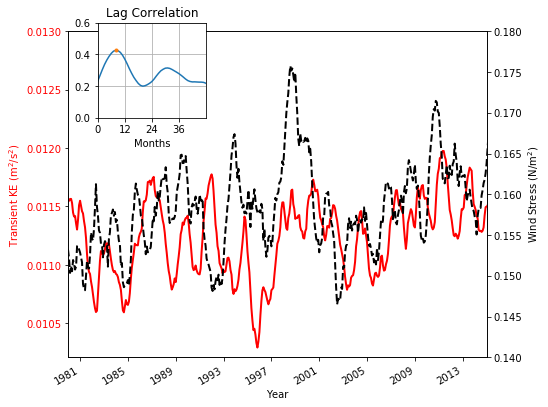

In [206]:
cherrypickplot(10)

Correlations: 7 months, 0.49, 0.00


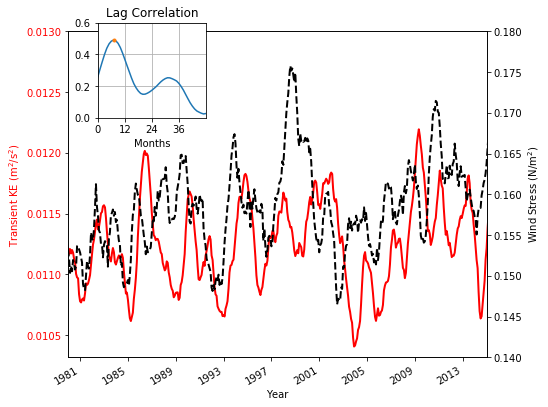

In [207]:
cherrypickplot(12)

Correlations: 7 months, 0.42, 0.00


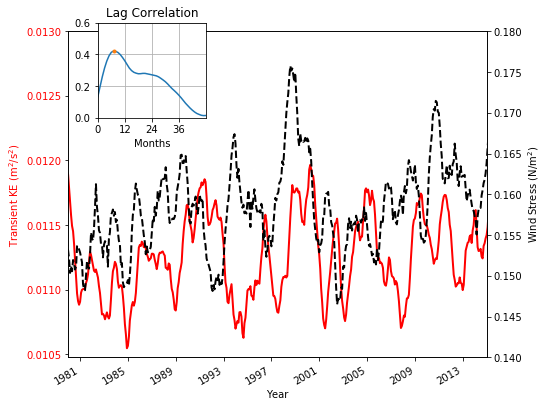

In [208]:
cherrypickplot(23)

Correlations: 8 months, 0.55, 0.00


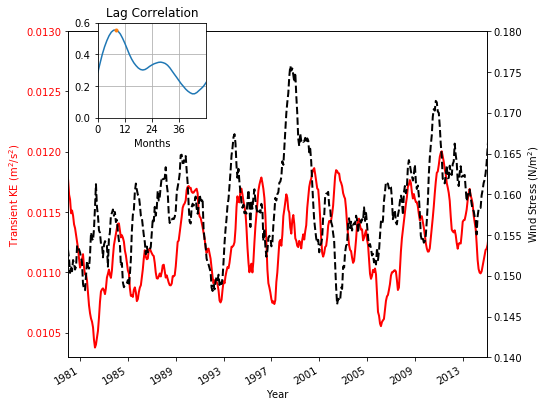

In [209]:
cherrypickplot(45)